# How to solve systems of linear equation?

## General case $Ax=b$

We need to solve the system of equations $Ax=b$. There are certain things that can happen.
    * A is squared and has a full rank  (very good matrix)
    * A is squared and doesn't have full rank. (Look underdetermined case below)
    * A is underdetermined. It has more columns than rows.
    * A is overdetermined. We have more equations than unknowns, or simpler more rows than columns.
 if $A$ has a rank deficiency, there is nothing you can do. Fix the problem formulation and start again.

### Case 1: A is squared and has full rank. 

Best possible scenario. The system either has a unique solution or doesn't have any.
To solve one can use Gaussian elimination or $x=A^{-1}b$.

For large matrices the inversion or elimination may not be efficient then use LU decomposition, etc. If matrices have some further cool properties look at Cholesky decomposition...

In [2]:
import numpy as np
from numpy import linalg as LA

In [30]:
## solve the system exactly
print("Squared matrix")
A = np.matrix([[2,1], [3,1]])
b = np.array([2,3])
print("matrix\n", A)
## solves the system by Gaussian elimination
x_dir = np.linalg.solve(A,b)
print("Solution solve", x_dir)

Direct solution. Squared matrix
matrix
 [[2 1]
 [3 1]]
Solution solve [1. 0.]


### Case 2: A is underdetermined
Since at least one variable is unconstraint, in general there exists an infinite amount of solutions. But wikipedia says that there are other possiblities. Not interested in this for now.

Since there is infinite amount of solution, we can pick the smallest one by minimizing $||x||^2$ subject to constraint $Ax=b$. To find this minimal vector, we need to use the method of Lagrange multiples (\todo{check what are the assumptios for it}).
By using this method, we add the constraint to the minimization function, so that now we seek for the minimum of the following function:

$$L = ||x||^2 - \lambda(Ax-b)$$

To find $x$, we first find the derivative with respect to $x$, set it to 0, then find $\lambda$ given $Ax= b$ and substituting $\lambda$ back get $x$ as

$$x = A^T(AA^T)^{-1}b$$




### Case 3: A is overdetermined.

There are cases for which a unique solution exists, based on the linear independence of the rows.
See https://en.wikipedia.org/wiki/Overdetermined_system#Non-homogeneous_case

In general, if we are interested in an approximate solution (which  we are, when no unique one exists), here is where we can use the method called "ordinary least squares". We want to find a least-squares solution that minimizes the error $(Ax-b)$ (Not clear why are we looking for "least squares solution" and not some other kind of solution). To find this solution, we minimize

$$L = ||Ax-b||^2 = (Ax-b)^T(Ax-b)$$

To minimize, we compute the derivative over $x$, set it to 0. Since we have no $\lambda$ involved here as oppose to underdetermined case, we can directly get $x$ as:

$$x = (A^TA)^{-1}A^Tb$$

Both these cases became more clear thanks to this post: http://people.csail.mit.edu/bkph/articles/Pseudo_Inverse.pdf

**Question** Case 2 and Case 3 tell us how to find the solution. However, both of them include inverse of the matrix. Is there more efficient method for finding the solution for these cases? (SVD?)


### Let's check our thoughts with small examples.

In [35]:
## Checking if ordinary least squares gives the same solution as Gaussian elimination for simple matrix
## Case 1. Squared matrix
A = np.matrix([[2,1], [3,1]])
b = np.array([2,3])
x_dir = np.linalg.solve(A,b) # Does Gauss elimination
x_ls = (LA.inv(A.transpose()*A)*A.transpose()).dot(b)
print("Case 1. Squared matrix size", A.shape)
print("Gaussian elimination:", x_dir)
print("Least squares closed form solution:", x_ls)

Case 1. Squared matrix size (2, 2)
Gaussian elimination: [ 1.4 -0.7]
Least squares closed form solution: [[ 1.4 -0.7]]


Seems like least squares solution is pretty close to a real one for this case :)

But A is a squared matrix. Btw, the coeffient of the matrix A are observed points taken from $y=kx+b$, where (x,y) points are (2,2) and (3,3). Let's make  A an overdetermined matrix B by adding another point (4,4). This should anyway work since 3 points describe the same line.

In [7]:
## Case 3. Overdetermined matrix. No noise.
B =  np.matrix([[2,1], [3,1], [4,1]])
c =  np.array([2,3,4])
x3_ls = (LA.inv(B.transpose()*B)*B.transpose()).dot(c)
# x3_dir = np.linalg.solve(B,c)  ---> This doesn't work, since matrix is not squared any more
print("Case 3. Overdetermined size", B.shape)
print("Least squares solution:", x3_ls)

Case 3. Overdetermined size (3, 2)
Least squares solution: [[ 1.00000000e+00 -1.77635684e-15]]


In this case the least squares solution and exact solution coinside, since we have perfect measurements of the line. However, we can't find the exact solution by Gauss elimination, since matrix B is not squared.

Let's add some noise to the matrices and check if the least squares solution is close to the previous one.

In [8]:
## Case 3. Overdetermined matrix. Added noise
c_noisy = np.array([2.1, 3.2, 3.9])
x3_ls_noisy = (LA.inv(B.transpose()*B)*B.transpose()).dot(c_noisy)
print("Case 3. Overdetermined + noise size", B.shape)
print("Least squares solution:", x3_ls_noisy)

Case 3. Overdetermined + noise size (3, 2)
Least squares solution: [[0.9        0.36666667]]


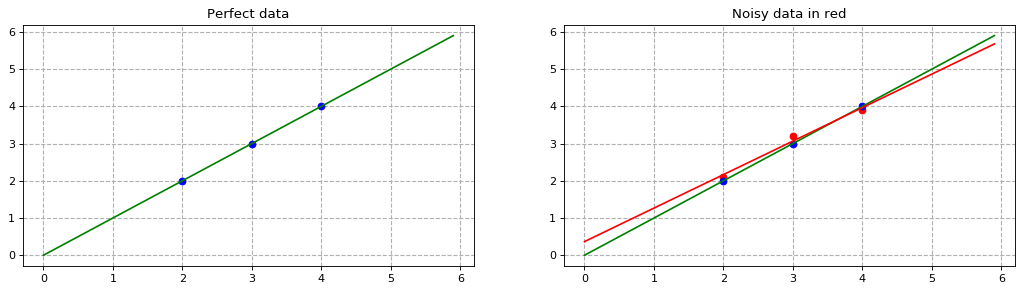

In [10]:
import matplotlib.pyplot as plt
## Visualization of the least squares solution
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(B[:,0], c, 'bo');
line = np.arange(0, 6, 0.1)

f = x3_ls[0,0] * line + x3_ls[0,1]
plt.plot(line, f, 'g-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Perfect data");

plt.subplot(122)
plt.plot(B[:,0], c_noisy, 'ro');
plt.plot(B[:,0], c, 'bo');

plt.plot(line, f, 'g-')
f = x3_ls_noisy[0,0] * line +  x3_ls_noisy[0,1]
plt.plot(line, f, 'r-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Noisy data in red");

Let's check the underdetermined case now. For the line example this would mean that we just have 1 point given.

Case 3. Underdetermined size (1, 2)
Least squares solution: [[0.8 0.4]]


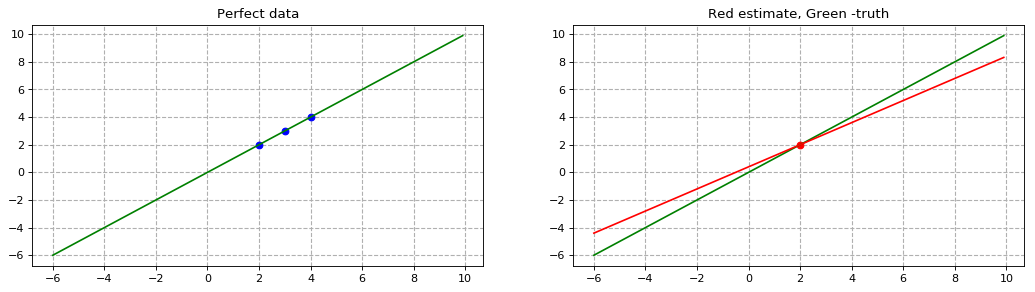

In [29]:
## Case 2. Underdetermined matrix.
A =  np.matrix([[2,1]])
b =  np.array([2])
x_under_ls = (A.transpose() * LA.inv(A*A.transpose())).dot(b)
print("Case 3. Underdetermined size", A.shape)
print("Least squares solution:", x_under_ls)

import matplotlib.pyplot as plt
## Visualization of the least squares solution
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(B[:,0], c, 'bo');
line = np.arange(-6, 10, 0.1)

f = x3_ls[0,0] * line + x3_ls[0,1]
plt.plot(line, f, 'g-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Perfect data");

plt.subplot(122)
plt.plot(A[:,0], b, 'ro');
# plt.plot(B[:,0], c, 'bo');

plt.plot(line, f, 'g-')
f = x_under_ls[0,0] * line +  x_under_ls[0,1]
plt.plot(line, f, 'r-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Red estimate, Green -truth");

## Solving homogeneous systems $Ax=0$

**Question**:
    What is the relation between the singular values/vectors and the solution of the system of linear equations?
**Answer:**
    The singular/eigenvector that corresponds to the smallest singular/eigenvalue is an approximate solution for Ax=0 if A is overdetermined. For A being underdetermined, the smallest singular value/eigenvalue is zero and thus the corresponding vector is an exact solution.


### Case 1. A squared has full rank
A possible exact solution in $x = 0$. If the solution exists it should be an eigenvector that corresponds to the only zero eigenvalue. 

**Question** Can square matrix A have a non-trivial solution to $Ax=0$?
**Answer** No, if square matrix (with full rank) has a solution it should be unique and it can only be 0 for $Ax=0$.

### Case 2. A is underdetermined
The singular vectors correspponding to the zero singular values of $A$ are the exact solution for $Ax=0$.

### Case 3. A is overdetermined

**Question** Can we find the $x$ if $A$ is overdetermined and $Ax=0$?
**Answer** yes, in the least squares sense by minimizimg the $||Ax||^2$.

Any vector $x$ that satisfies the $Ax=0$ is called to belong in the "null space" of A. A magical space where only those vectors live, which A turns into 0 :)  The simplest vector is zero vector, however "somehow" we are not interested in that.

So we are interested to find some vector x from a null-space that is not a zero vector.

**Claim (someone's)**  The solution $x$ is the eigenvector corresponding to a zero eigenvalue of $A^TA$.

Proof (not mine):  Since no exact solution exists, we seek to find the solution that minimizes the error $Ax-0$.

$||Ax||^2$ = opening norm = $(Ax)^TAx = x^TA^TAx$ subject to a constraint $x^Tx = 1$

Using cool trick with Lagrange multipliers, we "put" the constraint into the minimization function.

$$L(x) = x^TA^TAx - \lambda(x^Tx-1)$$

Now searching for minimum of $L(x)$ by taking the derivative over x and set it to 0.
$A^TAx - \lambda x =0$

By inspecting the last expression, we can see that it suspiciously looks like eigenvectors definition $Av = \lambda v$, only A here is $A^TA$. Since the eigenvalues are non-negative values, the only way to minimize L(x) is eigenvalue to be 0 (or closest to 0)? This basically should prove that the non-boring (non-zero) solution to the $Ax=0$ is the eigenvector that corresponds to the zero eigenvalue of $A^TA$


There is a relation between singular and eigenvalues, so $Ax=0$ can also be solved with SVD, by decomposing the matrix $A$ and not $A^TA$. Note Cyrill: For a square, real, symmetric matrix with non-negative eigenvalues, the eigenvalues and singular values coincide, but it is not generally the case.


In [42]:
## Let's look t the example if this magic actually works
A = np.matrix([[-1,1,2,4], [2,0,1,-7]])
print("Having matrix of size ", A.shape, "\n", A)
print("With rank", LA.matrix_rank(A))

## let's find eigenvalues
w, v = np.linalg.eig(A.transpose()*A)
print("Right eigenvectors\n", v)
print("Eigenvalues", w)
print("Check if true. Should equal to zero vector", A*v[:,-1])

Having matrix of size  (2, 4) 
 [[-1  1  2  4]
 [ 2  0  1 -7]]
With rank 2
Right eigenvectors
 [[-0.26627157 -0.05793858  0.79460159 -0.87165686]
 [ 0.0598853  -0.36066205 -0.52908598 -0.38942313]
 [ 0.01657747 -0.93062443  0.16161113  0.19986771]
 [ 0.96189313  0.02245401  0.25011633 -0.22049229]]
Eigenvalues [ 7.02490310e+01  5.75096901e+00  5.64956686e-16 -7.60227229e-16]
Check if true. Should equal to zero vector [[ 2.22044605e-16]
 [-6.66133815e-16]]


## Summary
An attempt to summaries the above into a table.

![table](data/system_linear.jpg)


## What to do for large systems?

**Computing the inverse $A^{-1}$ within solving $Ax=b$ or ways around computing $A^{-1}$ for large systems**

Solving $Ax=b$ requires to compute $x = A^{-1}b$. This can be done in multiple ways. Here 3 common options:

### Option 1: Invert $A$ explicitly 

Invert $A$ explicitly and compute $x = A^{-1}b$. This can be done for small systems but is slow.

### Option 2: Solve $Ax=b$ using Cholesky decomposition 

The Cholesky decomposition $chol(A)$ of $A$ computes a lower triangular matrix $L$ with positive elements on the main diagonal such that $LL^T = A$. Its complexity is $O(n^3)$.

To solve $Ax=b$ we solve $LL^Tx=b$ and this is done in two steps, solving two simpler linear systems, namely:

First: Solve $Lz=b$ w.r.t. $z$, which is easy as $L$ is a lower triangular matrix. We obtain $z$ in $O(n^2)$.

Second: Solve $L^Tx=z$ which yields $x$. This is again easy as $L^T$ is an upper triangular matrix.

Note that if $A$ is sparse also $L$ shows a sparsity pattern and in this case, $chol(A)$ can be computed faster than $O(n^3)$. This is for example the case for SLAM of BA problems.

**Variants:** In a similar way, one can use LU decomposition or QR decomposition. If matrix A is positive definite use Cholesky decomposition. For square matrices, one case use LU decomposition, for non-square matrices, QR decomposition.

**Note:** I the same way, we can also to solve $x = (A^T A)^{-1} A^T b$ by:

$LL^T = chol(A^T A)$

$b' = A^T b$

Solve $Lz=b'$ w.r.t. $z$

Solve $L^Tx=z$ which yields $x$


### Option 3: Solve $Ax=b$ using conjugate gradients

Conjugate gradients is an algorithm for numerically solving Ax=b for cases in which A is symmetric and positive-definite. Conjugate gradients is often implemented as an iterative algorithm and is applicable to sparse systems that are too large to be handled by a direct implementation or Cholesky decomposition. It can be seen as a glorified gradient descent where we are not following the gradients but so-called conjugate vectors.

The key idea of iterative CG is to reformulate $Ax=b$ as $Ax-b=0$. Then we can multiply $x^T$ from the left and obtain
$x^TAx-x^Tb=0$. Based on that, iterative CG aims as minimizes the function $f(x) = x^TAx-x^Tb$ iteratively. As this is a quadratic form we can do that in some smart way. See Wikipedia for details: https://en.wikipedia.org/wiki/Conjugate_gradient_method.

Note: There are further options such as Gauss-Seidel relaxation but for really large systems, conjugate gradients is typically the way to go.






